# Evaluating baseline performance

In this notebook, we illustrate the performance of the baseline box model against the official training split.

In [1]:
import os
import sys

if os.path.basename(os.getcwd()) == 'examples':
    sys.path.append("../")
    
import milliontrees

In [2]:
from deepforest import main
m = main.deepforest()
m.load_model("weecology/deepforest-tree")

/blue/ewhite/b.weinstein/miniconda3/envs/MillionTrees/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/blue/ewhite/b.weinstein/miniconda3/envs/MillionTrees/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Reading config file: /blue/ewhite/b.weinstein/miniconda3/envs/MillionTrees/lib/python3.10/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Reading config file: /blue/ewhite/b.weinstein/miniconda3/envs/MillionTrees/lib/python3.10/site-packages/deepforest/data/deepforest_config.yml


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


deepforest(
  (model): RetinaNet(
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): FrozenBatchNorm2d(64, eps=0.0)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): FrozenBatchNorm2d(64, eps=0.0)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): FrozenBatchNorm2d(256, eps=0.0)
            (relu): ReLU(inplace=True)
            (downsample): Sequential(
              (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias

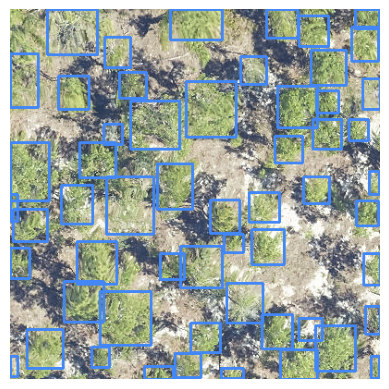

In [3]:
from deepforest import get_data
from deepforest.visualize import plot_results
boxes = m.predict_image(path=get_data("OSBS_029.png"))
plot_results(boxes)

In [4]:
# Load the box dataset
from milliontrees import get_dataset
from milliontrees.common.data_loaders import get_eval_loader

box_dataset = get_dataset("TreeBoxes", root_dir="/orange/ewhite/DeepForest/MillionTrees/")
box_test_data = box_dataset.get_subset("test")

In [ ]:
test_loader = get_eval_loader("standard", box_test_data, batch_size=16)

# Get predictions for the full test set
all_y_pred = []
all_y_true = []
all_metadata = []

for x, y_true, metadata in test_loader:
    for image in x:
        y_pred = m.predict_tile(image=image.permute(1, 2, 0).numpy())
        all_y_pred.append(y_pred)
        all_y_true.append(y_true)

# Evaluate
box_dataset.eval(all_y_pred, all_y_true, all_metadata)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]


Predicting: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...
[rank: 0] Received SIGTERM: 15
ERROR:tornado.general:SEND Error: Host unreachable
